In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/maternal-and-child-health-monitoring-in-lmics/training_label.csv
/kaggle/input/maternal-and-child-health-monitoring-in-lmics/sample submission.csv
/kaggle/input/maternal-and-child-health-monitoring-in-lmics/gee_features.csv
/kaggle/input/selecting-features-using-tree/y_train.csv
/kaggle/input/selecting-features-using-tree/x_train.csv
/kaggle/input/selecting-features-using-tree/__results__.html
/kaggle/input/selecting-features-using-tree/x_submission.csv
/kaggle/input/selecting-features-using-tree/__notebook__.ipynb
/kaggle/input/selecting-features-using-tree/DHSID.csv
/kaggle/input/selecting-features-using-tree/__output__.json
/kaggle/input/selecting-features-using-tree/custom.css


In [26]:
from matplotlib import pyplot as plt
from scipy.stats import pearsonr

**x_train, y_train, x_submission, DHSID**

In [2]:
x_train = pd.read_csv('/kaggle/input/selecting-features-using-tree/x_train.csv')
y_train = pd.read_csv('/kaggle/input/selecting-features-using-tree/y_train.csv')
x_submission = pd.read_csv('/kaggle/input/selecting-features-using-tree/x_submission.csv')
DHSID = pd.read_csv('/kaggle/input/selecting-features-using-tree/DHSID.csv')

Splitting into **x_train,y_train,x_test,y_test,x_val,y_val**

In [8]:
from sklearn.model_selection import train_test_split

# Set the random seed for reproducibility
random_seed = 42
np.random.seed(random_seed)

# Splitting the data into train and test sets based on country (80% train, 20% test)
x_train1, x_test, y_train1, y_test = train_test_split(x_train, y_train, test_size=0.2, stratify = x_train["key1"])

# Splitting the train set into train and val sets based on country (75% train, 25% dev)
x_train1, x_val, y_train1, y_val = train_test_split(x_train1, y_train1, test_size=0.25, stratify = x_train1["key1"])

Scaling using **Standrad Scaler**

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Stack the DataFrames vertically
merged_df = pd.concat([x_train, x_submission], axis=0)

# Separate the column names from the DataFrame
column_names = merged_df.columns.tolist()

scaled_data = scaler.fit_transform(merged_df)

scaled_df = pd.DataFrame(scaled_data, columns=column_names)

In [5]:
# Separating the DataFrame back into the original parts
x_train_scaled = scaled_df[:len(x_train)]
x_submission_scaled = scaled_df[len(x_train):]

Splitting **scaled data** into **x_train2,y_train2,x_test2,y_test2,x_val2,y_val2**

In [9]:
from sklearn.model_selection import train_test_split

# Set the random seed for reproducibility
random_seed = 42
np.random.seed(random_seed)

# Splitting the data into train and test sets based on country (80% train, 20% test)
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_train_scaled, y_train, test_size=0.2, stratify = x_train_scaled["key1"])

# Splitting the train set into train and val sets based on country (75% train, 25% dev)
x_train2, x_val2, y_train2, y_val2 = train_test_split(x_train2, y_train2, test_size=0.25, stratify = x_train2["key1"])

**MODEL1 : KNN REGRESSOR**

We will use the **scaled data** for analysis

In [12]:
from sklearn.neighbors import KNeighborsRegressor

In [40]:
knn = KNeighborsRegressor(n_neighbors=1)

In [41]:
# Fitting the k-nearest neighbors regressor from the training dataset
knn.fit(x_train2,y_train2)

KNeighborsRegressor(n_neighbors=1)

In [17]:
# Predicting for the x_test2
pred = knn.predict(x_test2)

Choosing the **K** value

In [20]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(x_train2,y_train2)
    pred_i = knn.predict(x_test2)
    error_rate.append(np.mean(pred_i != y_test))

/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/opt/conda/lib/python3.10/site-packages/

Creating a plot to visualize the relationship between **K** and **Error rate**

Text(0, 0.5, 'Error Rate')

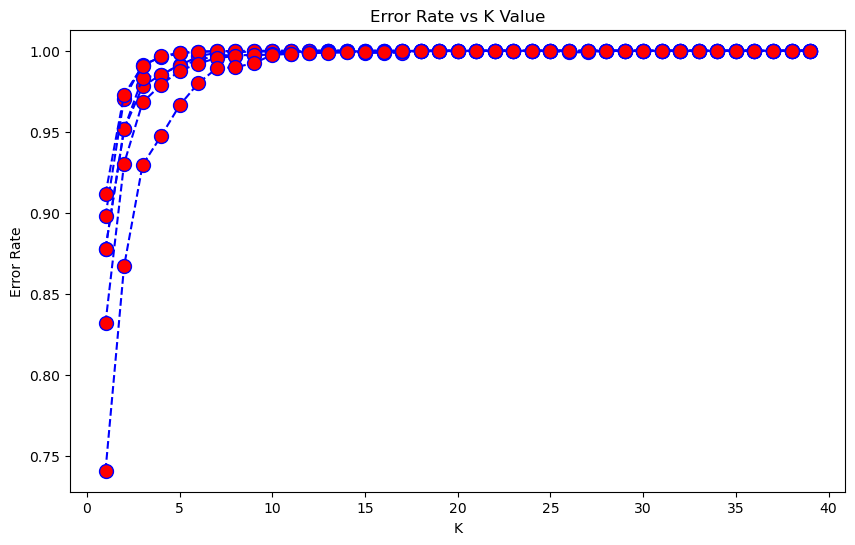

In [22]:
plt.figure(figsize=(10,6))

plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Now training with the obtained K = 7

In [23]:
knn = KNeighborsRegressor(n_neighbors = 7)
knn.fit(x_train2,y_train2)

KNeighborsRegressor(n_neighbors=7)

In [24]:
# Making predictions on test and validation data
y_test_pred = knn.predict(x_test2)
y_val_pred = knn.predict(x_val2)

Creating a function to calculate the pearson r2 value

In [44]:
def pearson_r2(y_test2,y_test_pred,y_val2,y_val_pred):
    # Calculating Pearson r^2 for each predicted column in test dataset

    pearson_r2_test = {}
    for col_idx, col_name in enumerate(y_test2.columns): 
        r_test, _ = pearsonr(y_test2[col_name], y_test_pred[:, col_idx])
        pearson_r2_test[f"{col_name}"] = r_test ** 2

    # Calculating Pearson r^2 for each predicted column in validation dataset

    pearson_r2_validation = {}
    for col_idx, col_name in enumerate(y_val2.columns):  
        r_val, _ = pearsonr(y_val2[col_name], y_val_pred[:, col_idx])
        pearson_r2_validation[f"{col_name}"] = r_val ** 2

    # Printing the squared Pearson correlation coefficients
    print("Squared Pearson r for predicted columns in the test dataset:")
    print(pearson_r2_test)

    print("\nSquared Pearson r for predicted columns in the validation dataset:")
    print(pearson_r2_validation)

Calling the function

In [45]:
pearson_r2(y_test2,y_test_pred,y_val2,y_val_pred)

Squared Pearson r for predicted columns in the test dataset:
{'Mean_BMI': 0.6136473372580058, 'Median_BMI': 0.6020953842792421, 'Unmet_Need_Rate': 0.39963648065544494, 'Under5_Mortality_Rate': 0.25177826478882354, 'Skilled_Birth_Attendant_Rate': 0.3393703321670579, 'Stunted_Rate': 0.2393844748298807}

Squared Pearson r for predicted columns in the validation dataset:
{'Mean_BMI': 0.632100075791416, 'Median_BMI': 0.6207882087145575, 'Unmet_Need_Rate': 0.4106427790656919, 'Under5_Mortality_Rate': 0.2594701632086015, 'Skilled_Birth_Attendant_Rate': 0.3379957238050924, 'Stunted_Rate': 0.26051463840889333}


**Prediction for submission data set**

In [30]:
knn = KNeighborsRegressor(n_neighbors = 7)
knn.fit(x_train_scaled,y_train)

KNeighborsRegressor(n_neighbors=7)

In [31]:
pred_submission = knn.predict(x_submission_scaled)

In [32]:
pred_submission

array([[25.18671828, 24.92767399, 23.30980207,  2.6809885 , 79.87137225,
        11.73221042],
       [25.5468032 , 25.44842491, 18.93355594,  3.79050508, 79.87137225,
         9.38576834],
       [24.90814685, 24.47338828, 22.97980207,  3.8709885 , 75.10994368,
        11.73221042],
       ...,
       [23.11838166, 21.93635477, 27.421763  ,  6.98855827, 85.28280174,
        30.9566499 ],
       [24.24409594, 23.30064048, 12.55462014,  3.50141542, 92.14851603,
        23.07640342],
       [24.06144288, 22.97276527, 15.09945008,  4.18380037, 83.69635516,
        26.68218173]])

Column names that we predicted

In [33]:
column_names = y_train.columns

Creating a dataframe as submission_df1

In [34]:
submission_df1 = pd.DataFrame(pred_submission, columns = column_names)

In [37]:
# Inserting the 'DHSID' column as the first column in the DataFrame
submission_df1.insert(0, 'DHSID', DHSID)

In [38]:
submission_df1

,DHSID,Mean_BMI,Median_BMI,Unmet_Need_Rate,Under5_Mortality_Rate,Skilled_Birth_Attendant_Rate,Stunted_Rate
0,AL200800000003,25.186718,24.927674,23.309802,2.680988,79.871372,11.732210
1,AL200800000005,25.546803,25.448425,18.933556,3.790505,79.871372,9.385768
2,AL200800000007,24.908147,24.473388,22.979802,3.870988,75.109944,11.732210
3,AL200800000008,25.724031,25.647747,14.557310,4.254307,83.897098,7.039326
4,AL200800000009,25.258317,25.097747,15.655881,4.730022,79.135669,7.039326
...,...,...,...,...,...,...,...
14995,ZW201500000382,23.602572,23.149532,18.499073,6.764980,54.379917,35.513300
14996,ZW201500000383,22.505162,21.906946,40.469834,11.875417,56.705208,33.925565
14997,ZW201500000386,23.118382,21.936355,27.421763,6.988558,85.282802,30.956650
14998,ZW201500000390,24.244096,23.300640,12.554620,3.501415,92.148516,23.076403


Submitting this to the competition

In [39]:
submission_df1.to_csv('submission1.csv',index = False)